In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use('ggplot')

# Data

In [2]:
df = pd.read_csv('data/whisky.csv')

In [3]:
df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


# Feature Engineering

In [5]:

df.drop(['RowID', 'Postcode', 'Latitude', 'Longitude'], axis=1, inplace=True)

> We drop features that are not relevant to the model.

In [6]:
df.isnull().sum()

Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
dtype: int64

> We verify that the dataset has no missing values, and encoded the categorical variable.

In [7]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Distillery'])
df['Distillery'] = labelEncoder.transform(df['Distillery'])

# Data Scaling

In [8]:
scaler = MinMaxScaler()
df[['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']] = scaler.fit_transform(df[['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']])


# Model Building

In [9]:
# Build cluster model
x = df.drop('Distillery', axis=1).values
kmeans = KMeans(n_clusters=4, random_state=7)
kmeans.fit(x)
y = kmeans.predict(x)

# Model Evaluation

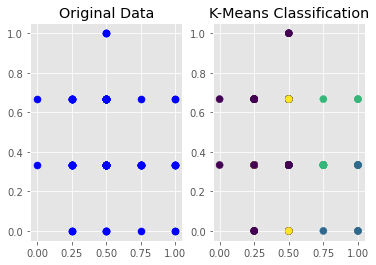

In [10]:
# visualise data
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], c='b', s=50)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', s=50)
plt.title('K-Means Classification')

plt.show()

> We use this visualisation to see how the model has labeled our clusters.

In [11]:
print(classification_report(y, kmeans.labels_))


precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00         6

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



> The average Precision and Recall is both 100% of the entire dataset, from these results we can conclude that the model is highly accurate.

In [12]:
print(confusion_matrix(y, kmeans.labels_))

[[46  0  0  0]
 [ 0  6  0  0]
 [ 0  0 28  0]
 [ 0  0  0  6]]


> Results from the confusion matrix support the above conclusion

# Optimise Model

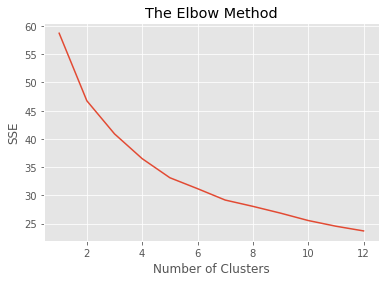

In [13]:
# elbow method
sse = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=7)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.plot(range(1,13), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=7)
kmeans.fit(x)
y = kmeans.predict(x)

In [15]:
print(classification_report(y, kmeans.labels_))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        12

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



> The average Precision and Recall is both 100% of the entire dataset, from these results we can conclude that the model is highly accurate.

In [16]:
print(confusion_matrix(y, kmeans.labels_))

[[74  0]
 [ 0 12]]


> Results from the confusion matrix support the above conclusion

Text(0.5, 1.0, 'K-Means Classification')

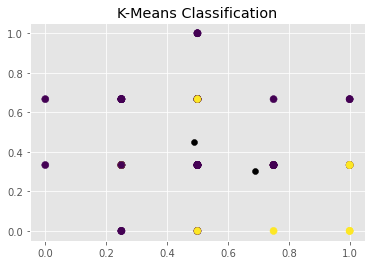

In [17]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('K-Means Classification')


> In the case of the two clusters, the two points in the middle displayed in purple, have a distance closer to the two centroids displayed in black as compared to the yellow data points.

# References

https://www.datacamp.com/community/tutorials/k-means-clustering-python

https://www.datasciencelearner.com/k-means-clustering-in-python-label-dataset/